In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Gaussian probability density functions

In [2]:
%pylab inline
import numpy.matlib
from IPython.display import HTML
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [3]:
mycolors = ListedColormap([
        '#fce7e7', '#ffb7b7', '#830000', # shades of red
        '#e7f2e7', '#cce7cc', '#3e9f3e', # shades of green
        '#e7ebf1', '#ccd7e0', '#003366', # shades of blue
        '#e7ddc5', '#ddd3ac', '#beb091', '#ac9879', # shades of brown
        '#c5c5c5', '#7c7c7c', '#4f4f4f', '#3e3e3e' # shades of gray
    ])
r1, r2, r3, g1, g2, g3, b1, b2, b3, br1, br2, br3, br4, gr1, gr2, gr3, gr4 = mycolors.colors

A univariate Gaussian pdf is characterized by two parameters: the mean $\mu$ and the variance $\sigma^2$.

$$
p(x; \mu, \sigma^2) =
\frac{1}{\sqrt{2 \pi \sigma^2}}
e^{-\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2}}
$$

## Box-Muller transform

https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

Suppose $U_1$ and $U_2$ are independent random variables that are *uniformly distributed* in the interval (0, 1). Let <br><br>

$$
Z_0 = \sqrt{-2 \ln U_1} \cos(2 \pi U_2)
$$

and

$$
Z_1 = \sqrt{-2 \ln U_1} \sin(2 \pi U_2)~.
$$

Then Z0 and Z1 are independent random variables with a standard normal distribution.

In [4]:
def normrdn_generator():
    twopi  = 2 * pi
    while True:
        u1 = random.random()
        u2 = random.random()
        h = sqrt(-2.0 * log(u1))
        z0 = h * cos(twopi * u2)
        z1 = h * sin(twopi * u2)
        yield z0
        yield z1

In [5]:
def normrdn(n = 1, mu = 0, sigma = 1):
    values = np.zeros(n)
    generator = normrdn_generator()
    for i in range(n):
        values[i] = next(generator)
    return sigma * values + mu

### Generating random numbers

In [6]:
n, mu, sigma = 10000, 5, 2
z = normrdn(n, mu, sigma)

### Estimating the parameters of the Gaussian pdf

In [7]:
mu_est, sigma_est = np.mean(z), np.std(z)
print('mu = {0}, sigma = {1}'.format(mu_est, sigma_est))

mu = 4.9980472551, sigma = 1.99115068589


### Create a histogram

In [8]:
interval = (-4 * sigma + mu, 4 * sigma + mu)
hist, bins = np.histogram(z, 200, interval)

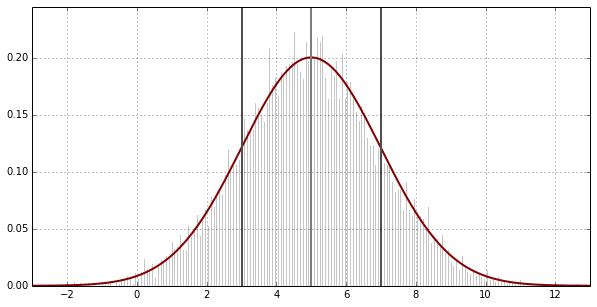

In [9]:
figure(figsize(10, 5))
dx = (interval[1]- interval[0]) / 200
ymax = max(hist) / (sum(hist) * dx) * 1.1
plt.xlim(interval)
plt.ylim(0, ymax)
plt.grid()

# draw histogram
markerline, stemlines, baseline = plt.stem(bins[:len(bins)-1], hist / (sum(hist) * dx), markerfmt=' ')
pyplot.setp(stemlines, color = gr1)

# draw Gaussian pdf
x = linspace(interval[0], interval[1], 200)
y = exp(-.5*(x - mu_est)**2 / sigma_est**2) / (sqrt(2 * pi) * sigma_est)
plt.plot(x, y, c = r3, linewidth = 2)

# draw vertical lines for the mean and the range of the standard deviation
plt.axvline(x = mu_est, c = gr2, linewidth = 2)
plt.axvline(x = mu_est - sigma_est, c = gr3, linewidth = 2)
plt.axvline(x = mu_est + sigma_est, c = gr3, linewidth = 2);

## Multivariate Gaussian pdfs

A multivariate Gaussian pdf is characterized by two parameters: the mean vector $\pmb{\mu}$ and the covariance matrix $\pmb{\Sigma}$.

$$
p(\pmb{x}; \pmb{\mu}, \pmb{\Sigma}) =
\frac{1}{\sqrt{|2 \pi \Sigma|}}
e^{-\frac{1}{2} (\pmb{x} - \pmb{\mu})^\mathsf{T} \pmb{\Sigma}^{-1} (\pmb{x} - \pmb{\mu})}
$$

### Questions

<ol>
  <li>What are the properties of the covariance matrix?</li><br>
  <li>What is the maximum value of $\text{cov}(X_1, X_2)$?</li>
</ol>

### Creating a multivariate Gaussian random variable with given parameters $\pmb{\mu}$  and $\pmb{\Sigma}$

Cholesky decomposition of the covariance matrix $\pmb{\Sigma}$:

https://en.wikipedia.org/wiki/Cholesky_decomposition

$$
\pmb{L} \cdot \pmb{L}^\mathsf{T} = \pmb{\Sigma}
$$

Let $\pmb{X}$ be a random variable with Gaussian pdf, $\pmb{\mu}_{\pmb{X}} = \pmb{0}$ and $\pmb{\Sigma}_{\pmb{X}} = \pmb{I}$.

Affine transformation of $\pmb{X}$:

$$
\pmb{X}' = \pmb{L} \cdot \pmb{X} + \pmb{\mu}
$$

The transformed multivariate Gaussian random variable $\pmb{X}'$ has mean vector $\pmb{\mu}_{\pmb{X}'} = \pmb{\mu}$ and covariance matrix $\pmb{\Sigma}_{\pmb{X}'} = \pmb{\Sigma}$ as desired.

In [10]:
def mvnrdn(n = 1, mean = np.zeros(2), covmat = np.eye(2), values = None):
    d = len(mean)
    assert len(covmat) == len(covmat[0]), "The covariance matrix must be quadratic"
    assert d == len(covmat), "The dimensions of the mean vector and the covariance matrix do not match"
    L = numpy.linalg.cholesky(covmat)
    if values == None:
        values = np.zeros((d, n))
        for i in range(d):
            values[i] = normrdn(n, 0, 1)
    return np.dot(L, values) + numpy.matlib.repmat(mean.reshape((d, 1)), 1, n)

### Generating random numbers

In [11]:
n = 1000
mean = np.array([2, 1])
covmat = np.array([[2, 1.2], [1.2, 1]])
z = mvnrdn(n, mean, covmat)

### Estimating the parameters of the multivariate Gaussian pdf

In [12]:
mean_est = np.mean(z, 1)
covmat_est = np.cov(z)
print('mean vector:\n  {0}\n'.format(mean_est))
print('covariance matrix:\n  {0}'.format(covmat_est))

mean vector:
  [ 1.96982577  0.97595672]

covariance matrix:
  [[ 2.02310244  1.20461533]
 [ 1.20461533  0.9810131 ]]


### Visualization in 2-D

In [13]:
interval = 4 * max(np.diagonal(covmat))**.5 + max(abs(mean))

In [14]:
def cov_ellipse(mean, covmat):
    a1 = sqrt(covmat[0, 0]);
    a3 = covmat[0, 1] / a1;
    a2 = sqrt(covmat[1, 1] - a3*a3);
    t = linspace(0, 2*pi, 101)
    x1 = a1 * cos(t) + mean[0]
    x2 = a3 * cos(t) + a2 * sin(t) + mean[1]
    return np.r_['0,2', x1, x2]

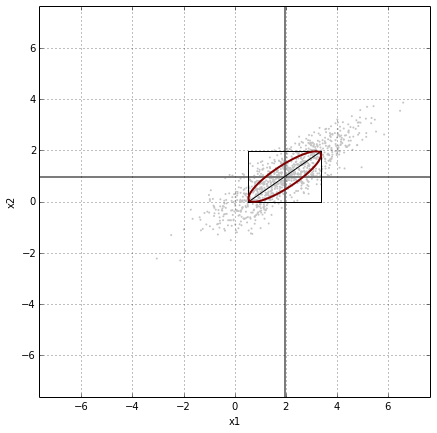

In [15]:
figure(figsize(7, 7))
# draw the samples
plt.scatter(z[0], z[1], s = 4, c = gr1, edgecolors = 'none')
plt.xlabel('x1'), plt.ylabel('x2')
plt.xlim(-interval, interval)
plt.ylim(-interval, interval)

# draw a horizontal and a vertical line through the mean
plt.axhline(y = mean_est[1], c = gr2, linewidth = 2)
plt.axvline(x = mean_est[0], c = gr2, linewidth = 2)

# draw the bounding box of the covariance ellipse and its diagonal
rect_x1 = mean_est[0] - sqrt(covmat_est[0,0])
rect_x2 = mean_est[0] + sqrt(covmat_est[0,0])
rect_y1 = mean_est[1] - sqrt(covmat_est[1,1])
rect_y2 = mean_est[1] + sqrt(covmat_est[1,1])
plt.plot((rect_x1, rect_x1), (rect_y1, rect_y2), 'k-')
plt.plot((rect_x2, rect_x2), (rect_y1, rect_y2), 'k-')
plt.plot((rect_x1, rect_x2), (rect_y1, rect_y1), 'k-')
plt.plot((rect_x1, rect_x2), (rect_y2, rect_y2), 'k-')
if covmat_est[0, 1] >= 0:
    plt.plot((rect_x1, rect_x2), (rect_y1, rect_y2), 'k-')
else:
    plt.plot((rect_x1, rect_x2), (rect_y2, rect_y1), 'k-')
    
# draw the covariance ellipse
ellipse = cov_ellipse(mean_est, covmat_est)
plt.plot(ellipse[0], ellipse[1], c = r3, linewidth = 2)
plt.grid()

#### Animation: influence of $\text{cov}(X_1, X_2)$

In [16]:
if False:
    cov11, cov22 = 3, 2
    cov12 = sqrt(cov11 * cov22) - 1e-10
    c1 = linspace(0, cov12, 100)
    c2 = linspace(cov12, -cov12, 200)
    c3 = linspace(-cov12, 0, 100)
    cov12_values = np.append(np.append(c1, c2), c3)
    
    samples = mvnrdn(1000)
    
    for i, cov12 in enumerate(cov12_values):
        mean = np.array([0, 0])
        covmat = np.array([[cov11, cov12], [cov12, cov22]])
        z = mvnrdn(mean = mean, covmat = covmat, values = samples)
        ellipse = cov_ellipse(mean, covmat)
    
        fig = figure(figsize(4, 4))
        plt.grid()
        plt.xlim(-3, 3), plt.ylim(-3, 3)
        
        # draw the samples
        plt.scatter(z[0], z[1], s = 4, c = gr1, edgecolors = 'none')

        # draw a horizontal and a vertical line through the mean
        plt.axhline(y = mean[1], c = gr2), plt.axvline(x = mean[0], c = gr2)
        
        # draw the bounding box of the covariance ellipse and its diagonal
        rect_x1 = mean[0] - sqrt(covmat[0,0])
        rect_x2 = mean[0] + sqrt(covmat[0,0])
        rect_y1 = mean[1] - sqrt(covmat[1,1])
        rect_y2 = mean[1] + sqrt(covmat[1,1])
        plt.plot((rect_x1, rect_x1), (rect_y1, rect_y2), 'k-')
        plt.plot((rect_x2, rect_x2), (rect_y1, rect_y2), 'k-')
        plt.plot((rect_x1, rect_x2), (rect_y1, rect_y1), 'k-')
        plt.plot((rect_x1, rect_x2), (rect_y2, rect_y2), 'k-')
        if covmat[0, 1] >= 0:
            plt.plot((rect_x1, rect_x2), (rect_y1, rect_y2), 'k-')
        else:
            plt.plot((rect_x1, rect_x2), (rect_y2, rect_y1), 'k-')

        # draw the covariance ellipse
        plt.plot(ellipse[0], ellipse[1], c = r3, linewidth = 2)
    
        # save the plot
        filename = './covmat/covmat{0:03d}.png'.format(i+1)
        fig.savefig(filename, format = 'png', dpi = 100)
        plt.close()

In [17]:
HTML("""
<video src='covmat.mp4' loop autoplay controls width='400' height='400' type='video/mp4'></video>
""")

In [18]:
def eval_gaussian(x, mean = np.array([0, 0]), covmat = np.array([[1, 0], [0, 1]])):
    x = x - mean
    inv = np.linalg.inv(covmat)
    return exp(-0.5 * np.dot(np.dot(x, inv), x)) / (sqrt(np.linalg.det(2 * pi * covmat)))

In [19]:
if False:
    cov11, cov22 = 3, 2
    cov12 = sqrt(cov11 * cov22) - 1e-10
    
    c1 = linspace(0, cov12, 100)
    c2 = linspace(cov12, -cov12, 200)
    c3 = linspace(-cov12, 0, 100)
    cov12_values = np.append(np.append(c1, c2), c3)

    x = linspace(-3, 3, 400)
    y = linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    
    for i, cov12 in enumerate(cov12_values):
        mean = np.array([0, 0])
        covmat = np.array([[cov11, cov12], [cov12, cov22]])
        ellipse = cov_ellipse(mean, covmat)
        Z = matplotlib.mlab.bivariate_normal(X, Y, sigmax = sqrt(cov11), sigmay = sqrt(cov22), sigmaxy = cov12)
        
        # plot the bivariate Gaussian pdf
        fig = figure(figsize(9, 4))
        ax1 = plt.subplot(1, 2, 1)
        plt.xlim(-3, 3), plt.ylim(-3, 3)
        plt.imshow(Z, interpolation = 'nearest', origin = 'lower', cmap = 'cool', extent=(-3, 3, -3, 3))
        plt.xlabel('x1'), plt.ylabel('x2')
        
        # horizontal and vertical lines through the mean
        plt.axhline(y = 0, c = 'k'), plt.axvline(x = 0, c = 'k')
        
        # draw the bounding box of the covariance ellipse and its diagonal
        x1, y1 = -sqrt(covmat[0,0]), -sqrt(covmat[1,1])
        width,  height = -2 * x1, -2 * y1
        ax1.add_patch(matplotlib.patches.Rectangle(
            (x1, y1), width, height, fill = False
        ))
        if covmat[0, 1] >= 0:
            plt.plot((x1, x1 + width), (y1, y1 + height), 'k-')
        else:
            plt.plot((x1, x1 + width), (y1 + height, y1), 'k-')       
        
        # draw the covariance ellipse
        plt.plot(ellipse[0], ellipse[1], c = '#d502ff', linewidth = 2)
        
        # second plot: change of the cov12 value
        ax2 = plt.subplot(1, 2, 2)
        plt.plot(cov12_values, c = '#505050')
        plt.plot(cov12_values[:i+1], c = '#fd0dff', linewidth = 2)
        plt.axhline(y = 0, c = 'k')
        plt.xlabel('t'), plt.ylabel('cov(x1, x2)')
        plt.grid()
        
        # save the plot
        plt.tight_layout(pad = 0.4, w_pad = 5.5, h_pad = 1.0)
        filename = './covmat/gaussian{0:03d}.png'.format(i+1)
        fig.savefig(filename, format = 'png', dpi = 100)
        plt.close()

In [20]:
HTML("""
<video src='gaussian.mp4' loop autoplay controls width='900' height='400' type='video/mp4'></video>
""")